# Triangles, transitivity, global, local and mean clustering coefficient

In [12]:
import networkx as nx
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
import matplotlib.pyplot as plt

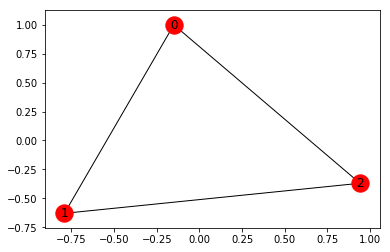

In [13]:
# Example complete graph
complete_graph = nx.complete_graph(3)
posizione = nx.spring_layout(complete_graph)
nx.draw_networkx(complete_graph,pos=posizione)

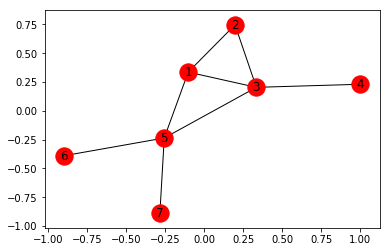

In [14]:
# Example: slides-exercise
exercise_graph = nx.Graph()
exercise_graph.add_nodes_from([1,2,3,4,5,6])
exercise_graph.add_edges_from([(1,2),(1,3),(1,5),(2,3),(3,4),(3,5),(5,6),(5,7)])
posizione = nx.spring_layout(exercise_graph)
nx.draw_networkx(exercise_graph,pos=posizione)

nodes: 34 - links:78


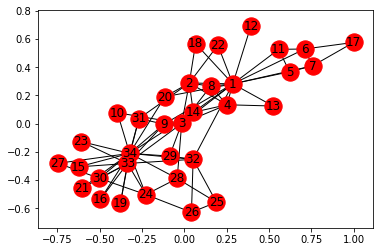

In [16]:
# Example: Karate_club dataset
karate_graph = nx.Graph()
karate_graph_edge_list=nx.Graph()
with open('karate.mtx') as f:
    f.readline()
    f.readline()
    for line in f:
        source, destination = line.strip().split(' ') #tuple
        karate_graph.add_edge(source,destination)
print('nodes: {} - links:{}'.format(karate_graph.order(),karate_graph.size()))
posizione = nx.spring_layout(karate_graph)
nx.draw_networkx(karate_graph,pos=posizione)

## Triangles
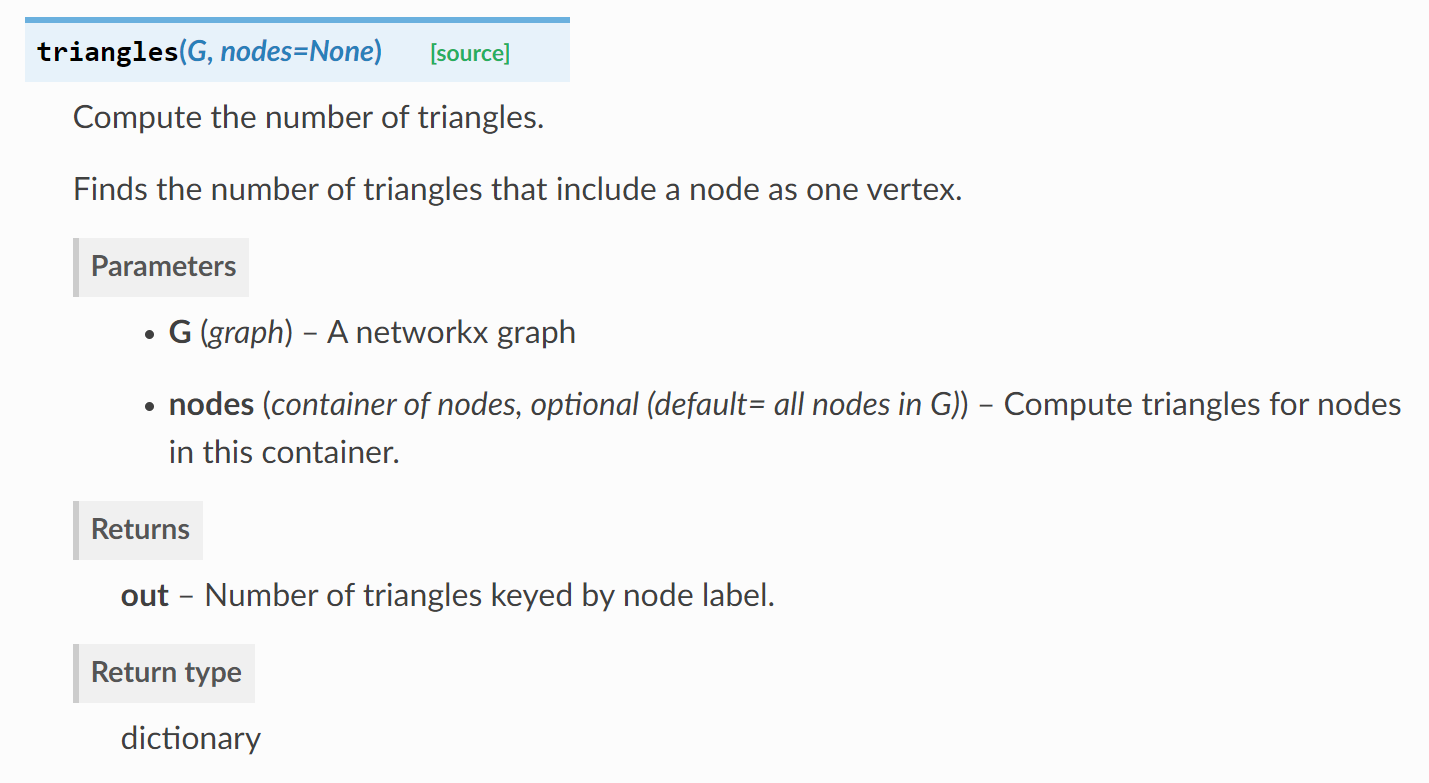

Note: When computing triangles for the entire graph each triangle is counted three times, once at each node. 
Note: Self loops are ignored.

In [18]:
print('complete graph - dictionary keyed by nodes: number of triangles {}'.format(nx.triangles(complete_graph)))
print('complete graph - number of triangles of node labelled 0: {}'.format(nx.triangles(complete_graph,0)))
print('complete graph - number of triangles of nodes labelled 0 and 1: {}'.format(nx.triangles(complete_graph,[0,1])))
print('complete graph - list of the number of triangles of all nodes: {}'.format(list(nx.triangles(complete_graph).values())))

complete graph - dictionary keyed by nodes: number of triangles {0: 1, 1: 1, 2: 1}
complete graph - number of triangles of node labelled 0: 1
complete graph - number of triangles of nodes labelled 0 and 1: {0: 1, 1: 1}
complete graph - list of the number of triangles of all nodes: [1, 1, 1]


In [19]:
print('exercise graph - dictionary keyed by nodes: number of triangles {}'.format(nx.triangles(exercise_graph)))
print('exercise graph - number of triangles of node labelled 1: {}'.format(nx.triangles(exercise_graph,1)))
print('exercise graph - list of the number of triangles of all nodes: {}'.format(list(nx.triangles(exercise_graph).values())))

exercise graph - dictionary keyed by nodes: number of triangles {1: 2, 2: 1, 3: 2, 4: 0, 5: 1, 6: 0, 7: 0}
exercise graph - number of triangles of node labelled 1: 2
exercise graph - list of the number of triangles of all nodes: [2, 1, 2, 0, 1, 0, 0]


In [20]:
print('karate graph - dictionary keyed by nodes: number of triangles {}'.format(nx.triangles(karate_graph)))
print('karate graph - number of triangles of node labelled 1: {}'.format(nx.triangles(karate_graph,'1')))
print('karate graph - list of the number of triangles of all nodes: {}'.format(list(nx.triangles(karate_graph).values())))

karate graph - dictionary keyed by nodes: number of triangles {'2': 12, '1': 18, '3': 11, '4': 10, '5': 2, '6': 3, '7': 3, '8': 6, '9': 5, '11': 2, '12': 0, '13': 1, '14': 6, '18': 1, '20': 1, '22': 1, '32': 3, '31': 3, '10': 0, '28': 1, '29': 1, '33': 13, '17': 1, '34': 15, '15': 1, '16': 1, '19': 1, '21': 1, '23': 1, '26': 1, '24': 4, '30': 4, '25': 1, '27': 1}
karate graph - number of triangles of node labelled 1: 18
karate graph - list of the number of triangles of all nodes: [12, 18, 11, 10, 2, 3, 3, 6, 5, 2, 0, 1, 6, 1, 1, 1, 3, 3, 0, 1, 1, 13, 1, 15, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1]


## Transitivity
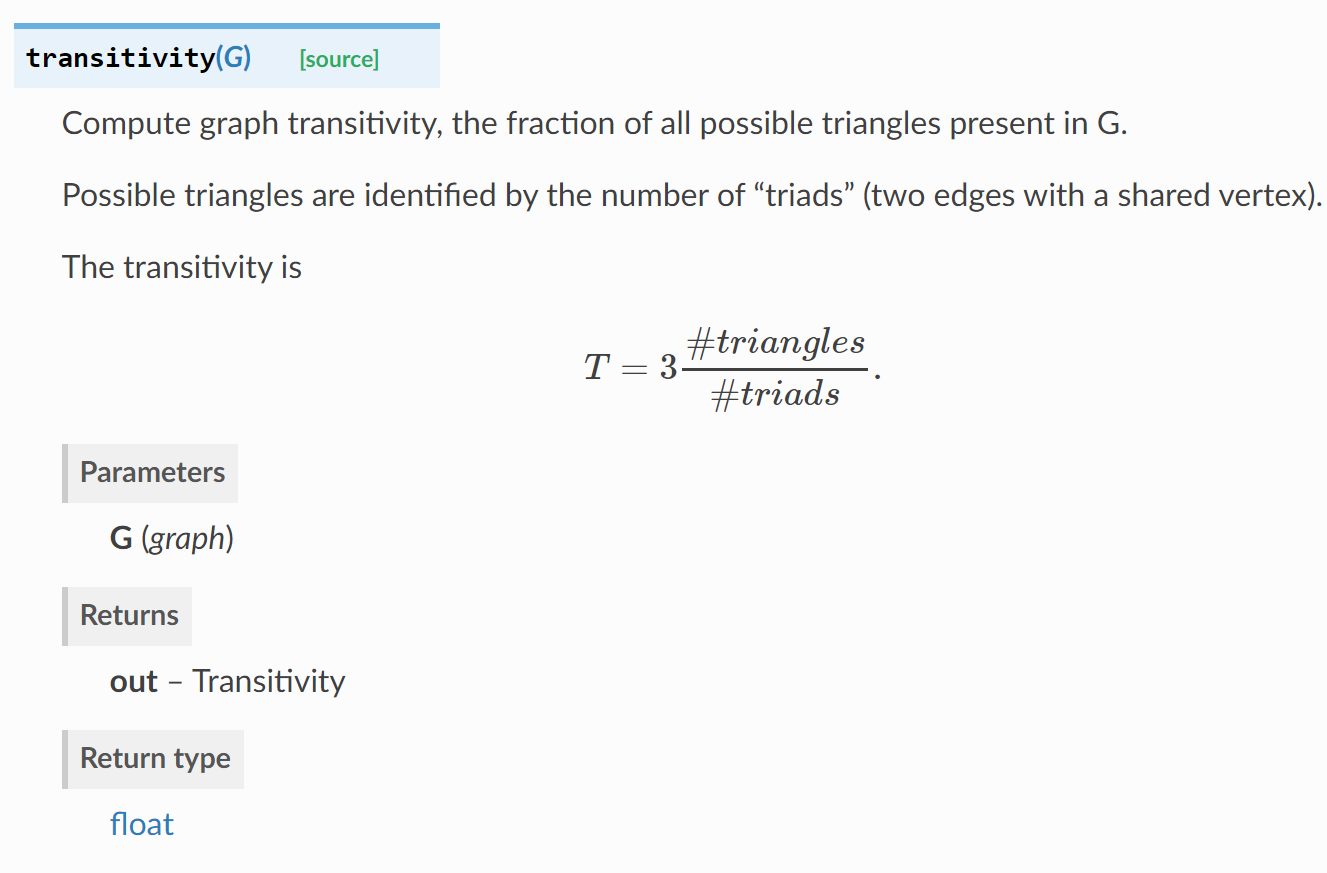

In [21]:
print('complete graph - transitivity: {}'.format(nx.transitivity(complete_graph)))
print('exercise graph - transitivity: {}'.format(nx.transitivity(exercise_graph)))
print('karate graph - transitivity: {}'.format(nx.transitivity(karate_graph)))

complete graph - transitivity: 1.0
exercise graph - transitivity: 0.375
karate graph - transitivity: 0.2556818181818182


## Local clustering coefficient

## clustering(G, nodes=None, weight=None)

#### We consider undirected, unweighted networks only

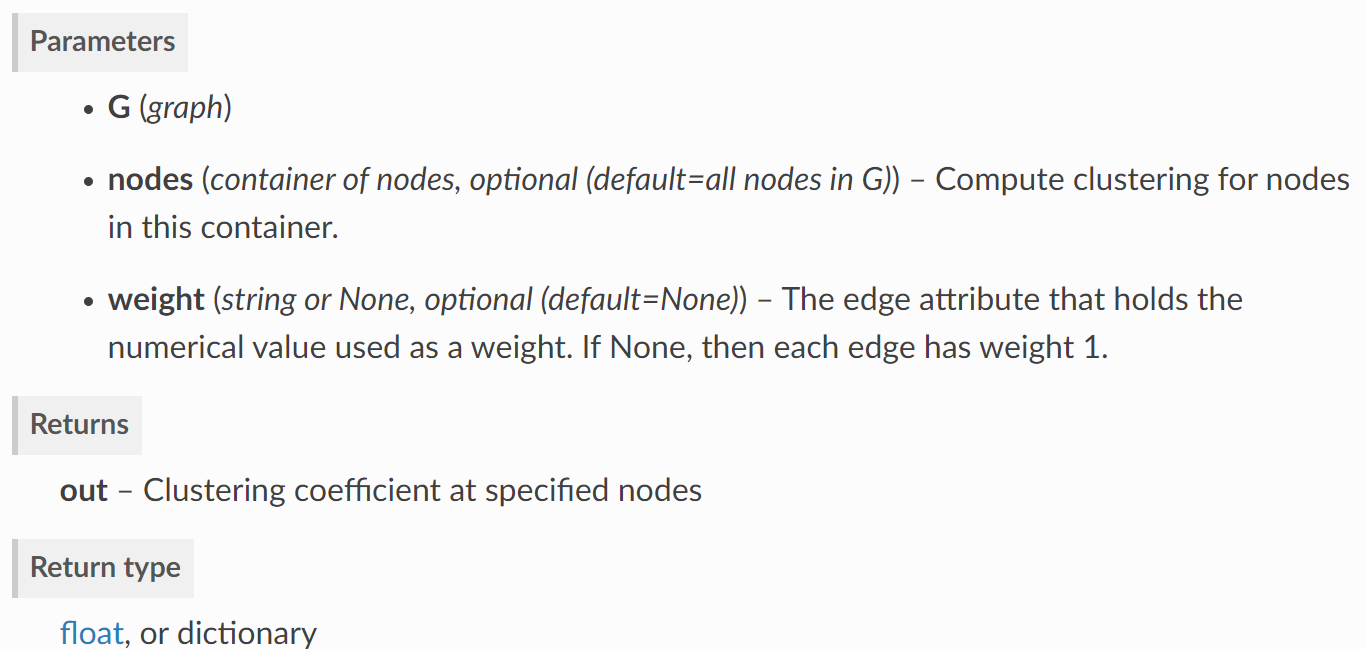

In [22]:
print('complete graph - local clustering: {}'.format(nx.clustering(complete_graph)))
print('exercise graph - local clustering: {}'.format(nx.clustering(exercise_graph)))
print('karate graph - local clustering: {}'.format(nx.clustering(karate_graph)))

complete graph - local clustering: {0: 1.0, 1: 1.0, 2: 1.0}
exercise graph - local clustering: {1: 0.6666666666666666, 2: 1.0, 3: 0.3333333333333333, 4: 0, 5: 0.16666666666666666, 6: 0, 7: 0}
karate graph - local clustering: {'2': 0.3333333333333333, '1': 0.15, '3': 0.24444444444444444, '4': 0.6666666666666666, '5': 0.6666666666666666, '6': 0.5, '7': 0.5, '8': 1.0, '9': 0.5, '11': 0.6666666666666666, '12': 0, '13': 1.0, '14': 0.6, '18': 1.0, '20': 0.3333333333333333, '22': 1.0, '32': 0.2, '31': 0.5, '10': 0, '28': 0.16666666666666666, '29': 0.3333333333333333, '33': 0.19696969696969696, '17': 1.0, '34': 0.11029411764705882, '15': 1.0, '16': 1.0, '19': 1.0, '21': 1.0, '23': 1.0, '26': 0.3333333333333333, '24': 0.4, '30': 0.6666666666666666, '25': 0.3333333333333333, '27': 1.0}


## Average clustering coefficient
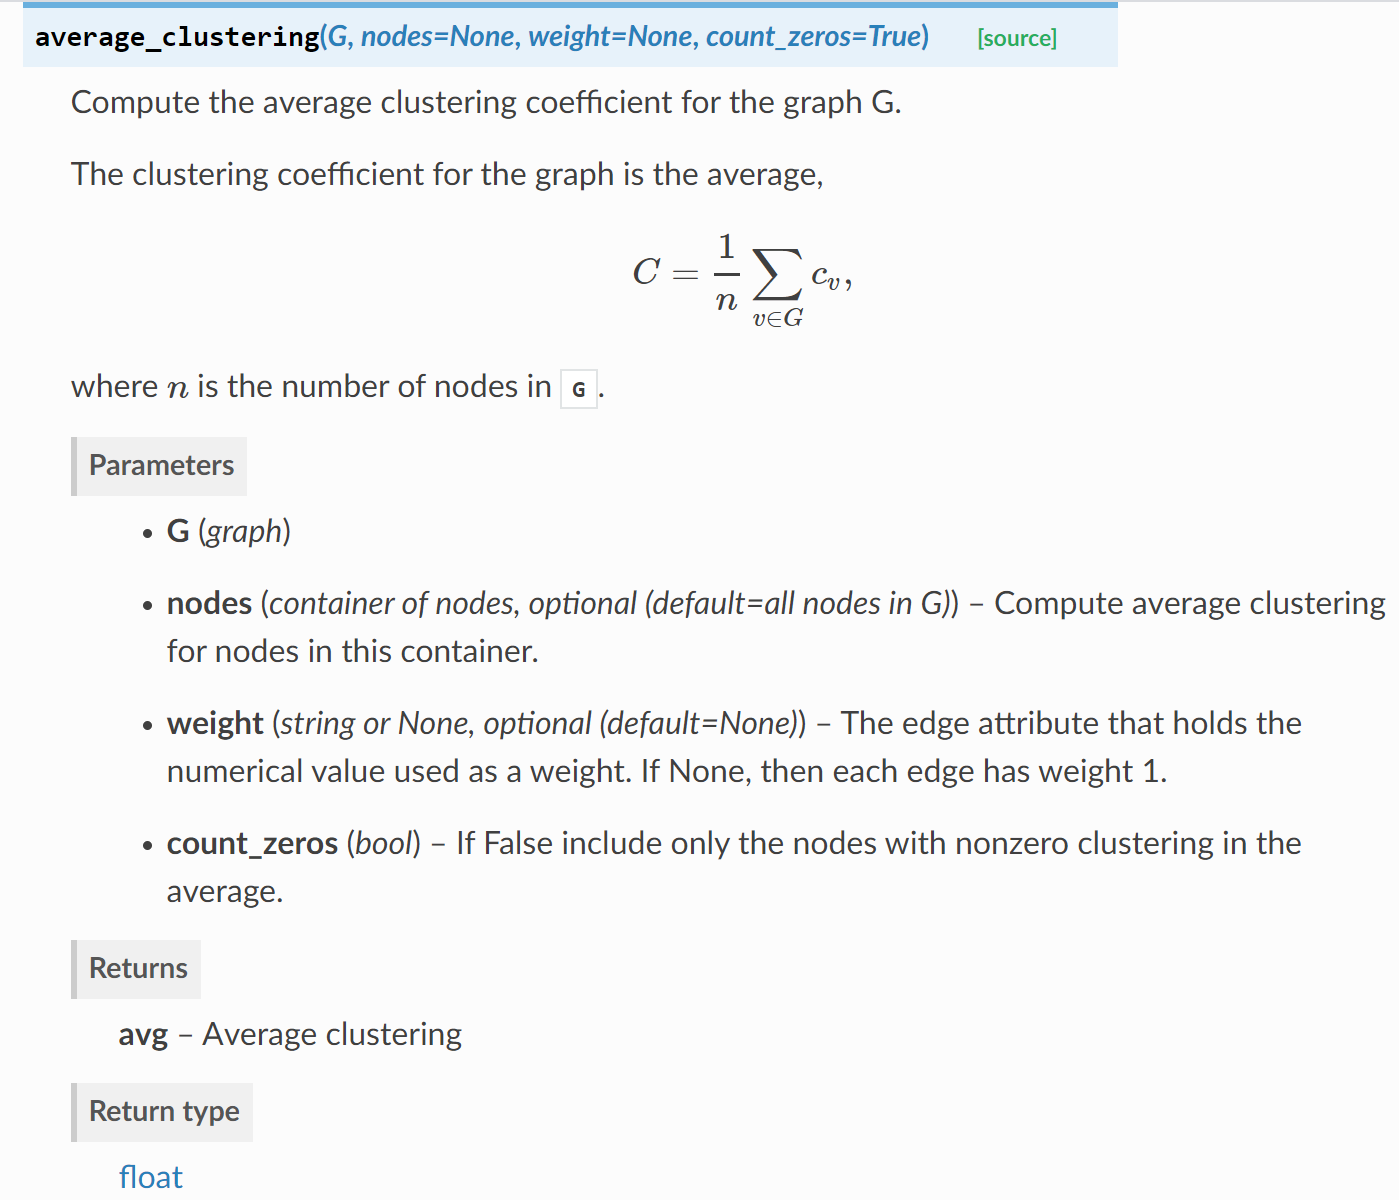

In [23]:
print('complete graph - average local clustering: {}'.format(nx.average_clustering(complete_graph)))
print('exercise graph - average local clustering: {}'.format(nx.average_clustering(exercise_graph)))
print('karate graph - average local clustering: {}'.format(nx.average_clustering(karate_graph)))

complete graph - average local clustering: 1.0
exercise graph - average local clustering: 0.3095238095238095
karate graph - average local clustering: 0.5706384782076823


In [24]:
# computing point statistics
local_clustering=nx.clustering(complete_graph)
list_local_clustering=list(local_clustering.values())
print('complete graph - mean local clustering: {}'.format(np.mean(list_local_clustering)))
print('complete graph - standard deviation local clustering: {}'.format(np.std(list_local_clustering)))

print('exercise graph - mean local clustering: {}'.format(np.mean(list(nx.clustering(exercise_graph).values()))))
print('exercise graph - standard deviation local clustering: {}'.format(np.std(list(nx.clustering(exercise_graph).values()))))

print('exercise graph - mean local clustering: {}'.format(np.mean(list(nx.clustering(karate_graph).values()))))
print('exercise graph - standard deviation local clustering: {}'.format(np.std(list(nx.clustering(karate_graph).values()))))

complete graph - mean local clustering: 1.0
complete graph - standard deviation local clustering: 0.0
exercise graph - mean local clustering: 0.3095238095238095
exercise graph - standard deviation local clustering: 0.3610893068595976
exercise graph - mean local clustering: 0.5706384782076823
exercise graph - standard deviation local clustering: 0.34226601177956495
